# US School Analysis

## Start with imports and reading in your data

In [1]:
# Include all your imports here
import pandas as pd
from pathlib import Path
import numpy

In [2]:
# Load the Public school dataset
school = Path('Resources/public_school_data.csv')
data = pd.read_csv(school)
data.head()

,NCESSCH,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [3]:
# Load the Public school locations dataset
locations = Path('Resources/public_school_locations.csv')
locations = pd.read_csv(locations)
locations.head()

,ID,LATCOD,LONCOD
0,10000500870,34.2602,-86.206200
1,10000500871,34.2622,-86.204900
2,10000500879,34.2733,-86.220100
3,10000500889,34.2527,-86.221806
4,10000501616,34.2898,-86.193300


In [4]:
# Load the Public school data dictionary file
dict = Path('Resources/school_data_dictionary.csv')
dict = pd.read_csv(dict)
print(dict)

      Fields                   Field Descriptions
0   OBJECTID                             OBJECTID
1      Shape                                Shape
2    NCESSCH                     Unique School ID
3   SURVYEAR  Year corresponding to survey record
4      STABR       Postal state abbreviation code
..       ...                                  ...
73     WHALM          All Students - White - Male
74     WHALF        All Students - White - Female
75        WH                 All Students - White
76    LATCOD                             Latitude
77    LONCOD                            Longitude

[78 rows x 2 columns]


## Data Exploration and Preparation

In [5]:
# Use an .isin() function to keep only fields that appear in the main public_school_data.csv and identify the unique id column 
field_df = dict[dict['Fields'].isin(data.columns)]
field_df

#Unique identifier column appears to be NCESSCH        


,Fields,Field Descriptions
2,NCESSCH,Unique School ID
12,LSTATE,Location state
21,SCHOOL_LEVEL,School level
25,SCHOOL_TYPE_TEXT,School type (description)
51,TOTAL,Total students all grades (includes AE)
53,FTE,Total Teachers
54,STUTERATIO,Student teacher ratio
57,AM,All Students - American Indian/Alaska Native
60,AS,All Students - Asian
63,BL,All Students - Black or African American


In [6]:
# Ensure the column you selected is indeed a unique identifier by checking the number of uniqe values and comparing it to the number of rows in the dataframe
print(f"The number of unique values is: {data['NCESSCH'].nunique()}")
print(f"The total number of rows in the data is {len(data.index)}")

The number of unique values is: 100722
The total number of rows in the data is 100722


In [7]:
# Change the names of the unique ID column in both the location data and public school data to match and set them as index
data.rename(columns= {'NCESSCH': 'SCHOOL_ID'},inplace=True)
locations.rename(columns= {'ID': 'SCHOOL_ID'},inplace=True)

In [8]:
data.set_index('SCHOOL_ID', inplace=True)
locations.set_index('SCHOOL_ID', inplace=True)

In [9]:
# Check your work
data.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
SCHOOL_ID,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [10]:
# Check your work
locations.head()

,LATCOD,LONCOD
SCHOOL_ID,,
10000500870,34.2602,-86.206200
10000500871,34.2622,-86.204900
10000500879,34.2733,-86.220100
10000500889,34.2527,-86.221806
10000501616,34.2898,-86.193300


In [11]:
# Join the location and data dataframes together
frames = [data, locations]
combined_data = pd.concat(frames, axis=1, join='inner')

combined_data.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
SCHOOL_ID,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.2602,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.2622,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.2733,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.2527,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.2898,-86.193300


In [12]:
# Get the value counts for the school type column
combined_data['SCHOOL_TYPE_TEXT'].value_counts()

SCHOOL_TYPE_TEXT
Regular school                  91595
Alternative Education School     5588
Special education school         1946
Career and Technical School      1593
Name: count, dtype: int64

In [13]:
# Create a subset of the dataframe that only includes regular schools ensure it was successful by comparing rows in the subset to the value counts above
reg_schools = combined_data.loc[combined_data['SCHOOL_TYPE_TEXT'] == 'Regular school']
reg_schools.shape

(91595, 15)

## Data Cleaning and dealing with nulls

In [14]:
# Check for nulls and determine the best approach for dealing with them
reg_schools.isnull().sum()

LSTATE                  0
SCHOOL_LEVEL            0
SCHOOL_TYPE_TEXT        0
TOTAL                 868
FTE                  6653
STUTERATIO            532
AM                  22158
AS                  11894
BL                   7059
HP                  32405
HI                   2257
TR                   4972
WH                   2368
LATCOD                  0
LONCOD                  0
dtype: int64

In [15]:
# Fill some of the columns with 0 where it makes sense
### Filling demographic columns with 0 ###

#Creating new data frame
clean_schools = reg_schools

clean_schools.loc[:,("AM","AS","BL","HP","HI","TR","WH")] = clean_schools.loc[:,("AM","AS","BL","HP","HI","TR","WH")].fillna(0)



In [16]:
# Verify changes to nulls and prepare to drop na
clean_schools.isnull().sum()

LSTATE                 0
SCHOOL_LEVEL           0
SCHOOL_TYPE_TEXT       0
TOTAL                868
FTE                 6653
STUTERATIO           532
AM                     0
AS                     0
BL                     0
HP                     0
HI                     0
TR                     0
WH                     0
LATCOD                 0
LONCOD                 0
dtype: int64

In [17]:
# Drop remaining nulls wher it would make sense
schools_df = clean_schools.dropna()

In [18]:
# Verify changes to nulls and no nulls should remain
schools_df.isnull().sum()

LSTATE              0
SCHOOL_LEVEL        0
SCHOOL_TYPE_TEXT    0
TOTAL               0
FTE                 0
STUTERATIO          0
AM                  0
AS                  0
BL                  0
HP                  0
HI                  0
TR                  0
WH                  0
LATCOD              0
LONCOD              0
dtype: int64

## Plotting to help Clean the Data

<Axes: ylabel='Frequency'>

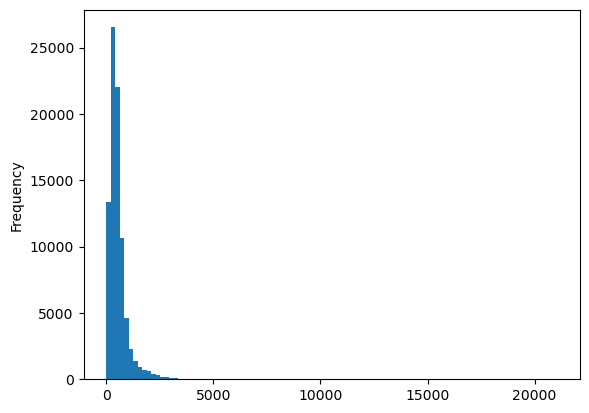

In [19]:
# Plot a histogram of Total enrolled students and check for outliers
schools_df['TOTAL'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

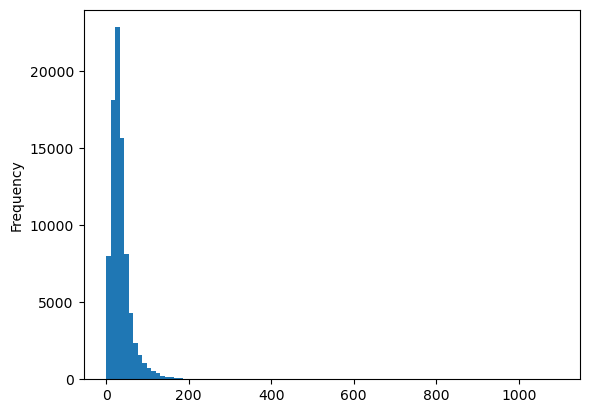

In [20]:
# Plot a histogram of Total Teachers and check for outliers
schools_df['FTE'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

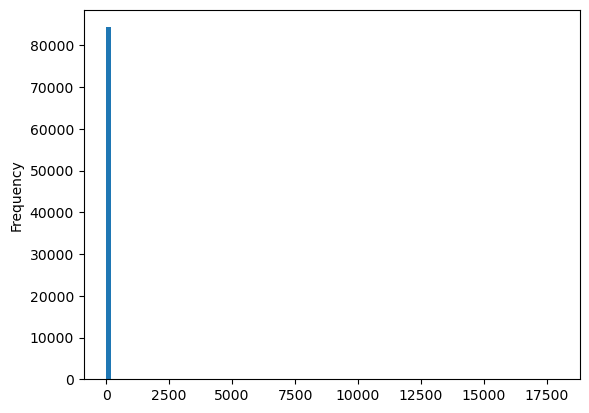

In [21]:
# Plot a histogram of Student Teacher Ratio and check for outliers
schools_df['STUTERATIO'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

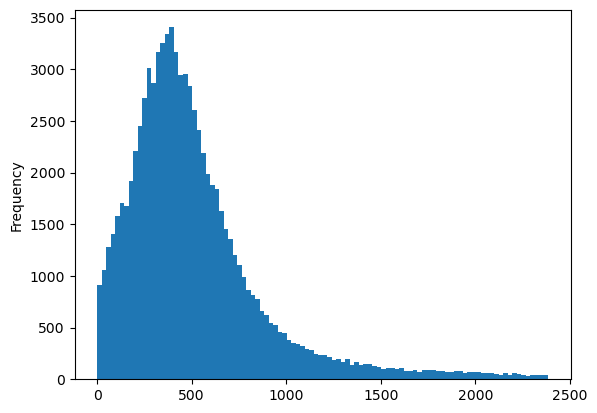

In [22]:
# Re-Plot a histogram of Total enrolled students after removing 0s and outliers above the 99th quantile
tqhigh = schools_df['TOTAL'].quantile(0.99)
total_filtered = schools_df[(schools_df['TOTAL'] > 0) & (schools_df['TOTAL'] <= tqhigh)]

total_filtered['TOTAL'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

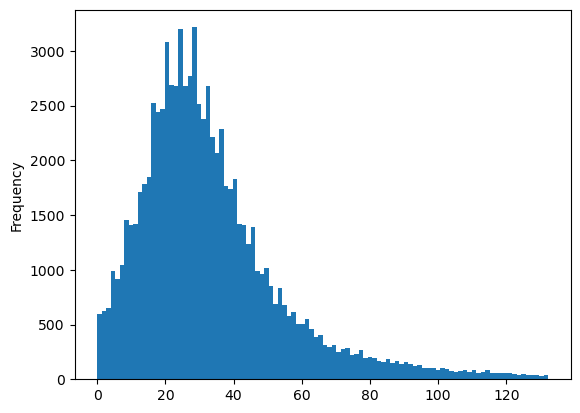

In [23]:
# Re-Plot a histogram of Total Teachers after removing 0s and outliers above the 99th quantile
fte_qhigh = schools_df['FTE'].quantile(0.99)
fte_filtered = schools_df[(schools_df['FTE'] > 0) & (schools_df['FTE'] <= fte_qhigh)]

fte_filtered['FTE'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

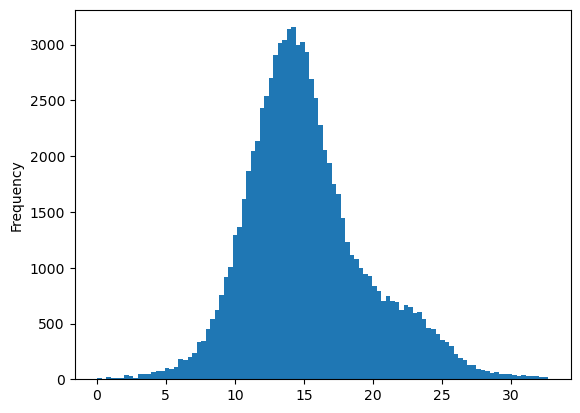

In [24]:
# Re-Plot a histogram of Student Teacher Ratio after removing 0s and outliers above the 99th quantile
ste_qhigh = schools_df['STUTERATIO'].quantile(0.99)
ratio_filtered = schools_df[(schools_df['STUTERATIO'] > 0) & (schools_df['STUTERATIO'] <= ste_qhigh)]

ratio_filtered['STUTERATIO'].plot(kind='hist', bins=100)

## Correlation Plot to Understand Data Relationships

<Axes: >

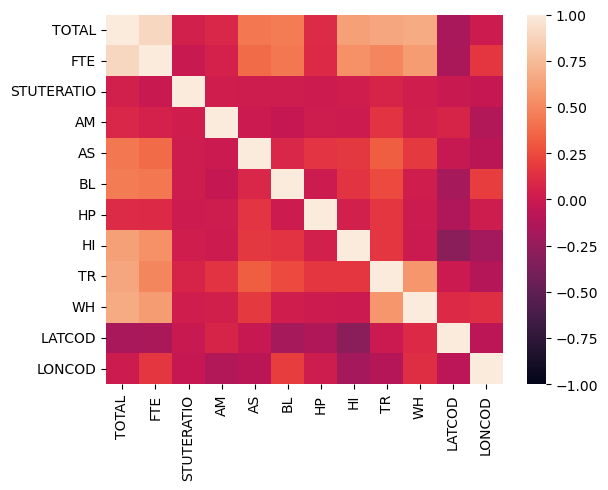

In [25]:
# Use seaborn to generate a correlation heatmap for the columns in the dataframe
import seaborn as sns


correlations = schools_df[["TOTAL","FTE","STUTERATIO","AM","AS","BL","HP","HI","TR","WH","LATCOD","LONCOD"]].corr()
correlations
sns.heatmap(correlations, vmin=-1, vmax=1)


## Geographic Plots

<Axes: xlabel='[LONCOD]', ylabel='[LATCOD]'>

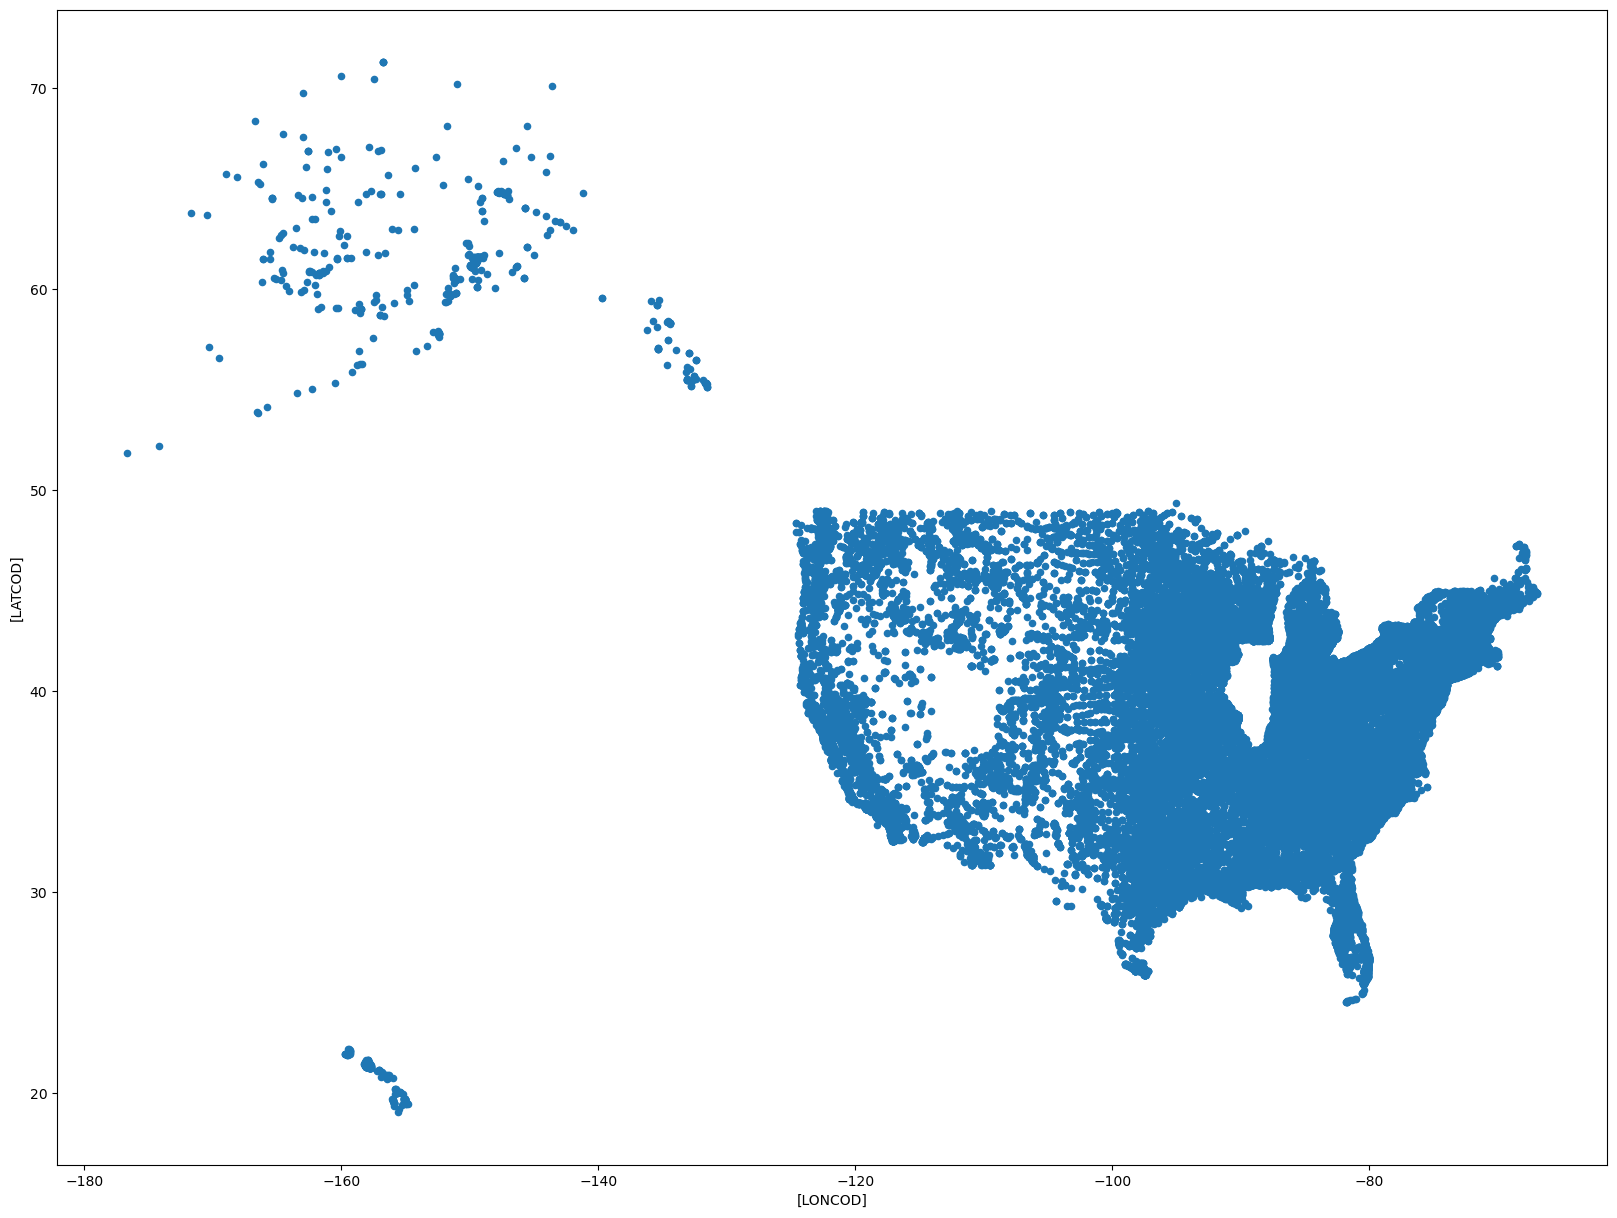

In [26]:
# Plot only schools from the 48 contiguous US states or the 50 US states (drop territories and PR)
#schools_df['LSTATE'].unique()

fifty_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'MD', 'FL',
       'GA', 'HI', 'ID', 'OR', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
       'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
      'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

fifty_states_df = schools_df.query('LSTATE in @fifty_states')
fifty_states_df.describe(include ='all')
fifty_states_df.plot.scatter(['LONCOD'], ['LATCOD'],figsize=(20,15))


<Axes: xlabel='[LONCOD]', ylabel='[LATCOD]'>

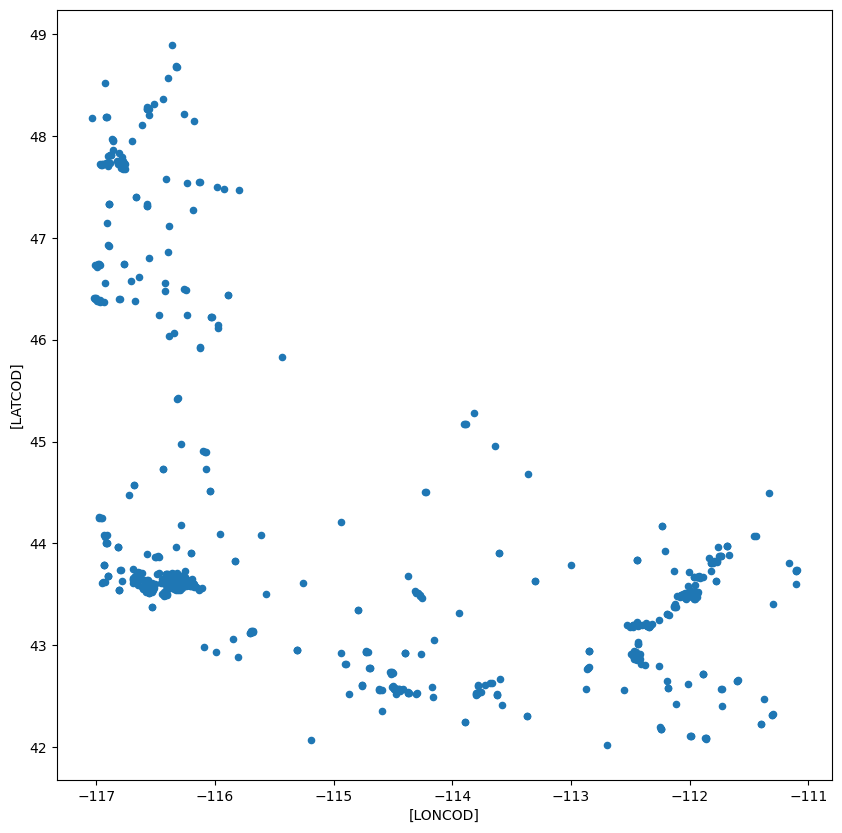

In [27]:
# Plot only schools in your state
idaho = ['ID']
idaho_df = schools_df.query('LSTATE in @idaho')

idaho_df.plot.scatter(['LONCOD'], ['LATCOD'],figsize=(10,10))


In [28]:
## Student/Teacher Ratio in Idaho
ratio_filtered.groupby('LSTATE').mean('STUTERATIO').loc('LSTATE' == 'ID')

## School Quality Analysis: Student/Teacher Ratios

In [29]:
# Use the dataframe that has filtered out the outliers in Student Teacher Ratio and group by state and get the average
# Show the highest 5 Student/Teacher ratios and lowest 5 Student/Teacher ratios as well as the average for your state

## Average of All States
ratio_filtered.groupby('LSTATE').mean('STUTERATIO')

## Top five states by Student/Teacher Ratio
ratio_filtered.groupby('LSTATE').mean('STUTERATIO').nlargest(5,'STUTERATIO')

## Bottom five states by Student/Teacher ratio
ratio_filtered.groupby('LSTATE').mean('STUTERATIO').nsmallest(5,'STUTERATIO')


,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
LSTATE,,,,,,,,,,,,
ME,294.152632,25.941053,10.818175,2.422807,4.122807,12.236842,0.287719,7.919298,9.056140,258.107018,44.433846,-69.525825
NH,340.718941,30.181894,10.852994,0.745418,11.105906,7.395112,0.274949,21.955193,13.920570,285.309572,43.252398,-71.529250
ND,238.058586,19.857232,10.924727,25.539394,3.517172,11.795960,0.579798,13.674747,9.286869,173.664646,47.416259,-99.763435
WY,266.841954,21.504598,10.996379,9.520115,1.905172,2.514368,0.422414,38.155172,9.060345,205.264368,42.781514,-107.107935
MT,175.956258,13.178153,11.167096,19.320778,1.268530,1.324423,0.352369,9.469016,7.493317,136.725395,46.980098,-110.450973


In [30]:
# What is the mean of the Student/Teacher Ratio
ratio_mean = round(ratio_filtered['STUTERATIO'].mean(),2)

print(f"The overall Student/Teacher Ratio Mean is {ratio_mean}")

The overall Student/Teacher Ratio Mean is 15.21


In [31]:
# What is the standard deviation of the Student/Teacher Ratio
ratio_sd = round(ratio_filtered['STUTERATIO'].std(),2)

print(f"The standard deviation for the Student/Teacher Ratio  is {ratio_sd}")

The standard deviation for the Student/Teacher Ratio  is 4.42


<Axes: title={'center': 'Student/Teacher Ratios by State'}, xlabel='State', ylabel='Student/Teacher Ratio'>

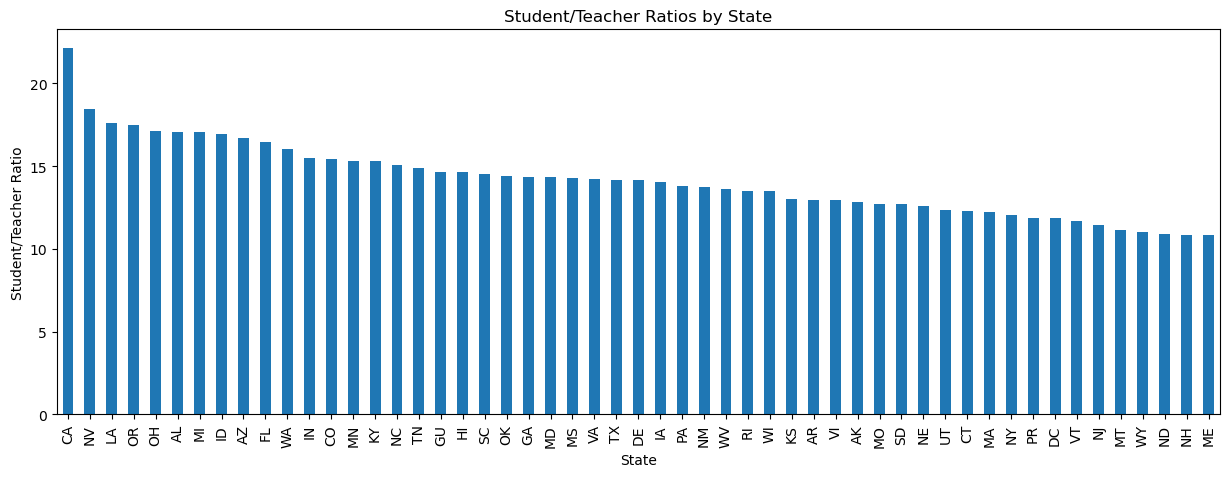

In [32]:
# Plot the states ratios in descending order
state_ratios = ratio_filtered.groupby('LSTATE').mean('STUTERATIO')
state_ratios.sort_values(by=['STUTERATIO'],ascending=False,inplace=True)
state_ratios['STUTERATIO'].plot(kind='bar',figsize=(15,5), ylabel='Student/Teacher Ratio', xlabel='State', title='Student/Teacher Ratios by State')

<Axes: >

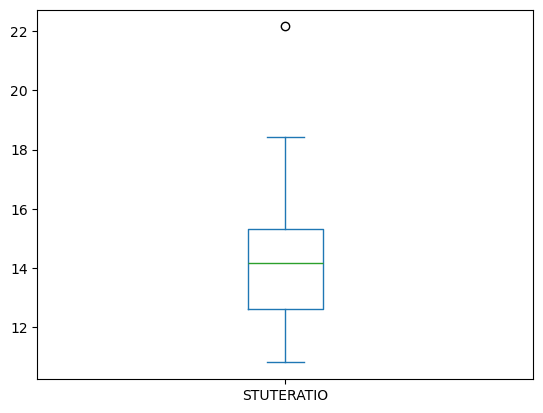

In [33]:
# Plot a boxplot of the Student/Teacher Ratios
state_ratios['STUTERATIO'].plot(kind='box')

In [34]:
# List or Plot the Highest 5 states
state_ratios.head()

,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
LSTATE,,,,,,,,,,,,
CA,655.948545,28.903574,22.149137,3.064864,78.452899,33.047559,2.831194,363.029567,32.556154,142.797273,35.743867,-119.544716
NV,740.433121,36.845541,18.436369,6.128981,40.727707,86.074841,11.074841,323.939490,51.961783,220.517516,37.440541,-116.428611
LA,524.529868,29.444686,17.626982,3.273856,8.412723,222.056633,0.430566,46.017843,16.107836,228.230411,30.782573,-91.628173
OR,442.013333,23.772300,17.472867,5.296667,18.390000,10.154167,3.495833,110.288333,30.298333,263.493333,44.632679,-122.333924
OH,477.825015,27.860228,17.128352,0.551714,12.997895,79.963019,0.431449,31.625676,27.616356,324.638906,40.458853,-82.758064


In [35]:
# List or plot the lowest 5
state_ratios.tail()


,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
LSTATE,,,,,,,,,,,,
MT,175.956258,13.178153,11.167096,19.320778,1.268530,1.324423,0.352369,9.469016,7.493317,136.725395,46.980098,-110.450973
WY,266.841954,21.504598,10.996379,9.520115,1.905172,2.514368,0.422414,38.155172,9.060345,205.264368,42.781514,-107.107935
ND,238.058586,19.857232,10.924727,25.539394,3.517172,11.795960,0.579798,13.674747,9.286869,173.664646,47.416259,-99.763435
NH,340.718941,30.181894,10.852994,0.745418,11.105906,7.395112,0.274949,21.955193,13.920570,285.309572,43.252398,-71.529250
ME,294.152632,25.941053,10.818175,2.422807,4.122807,12.236842,0.287719,7.919298,9.056140,258.107018,44.433846,-69.525825


In [36]:
# Print your state's Student Teacher Ratios



## Summarize your findings from any of the analysis or plots above:
* Were there any interesting Correlations?
* How did your state compare to others?
* Would you have made any different decisions in the earlier cleaning stages after becoming more familiar with the data?
* What is going on in IL?
* What other analysis could be done with this data?

## BONUS: Generate other interesting analysis or plots

In [ ]:
# Your code below
